# Content

+ Testing hypotheses about the equality of means
+ Testing hypotheses about the covariance matrix
+ Linear regression and analysis of variance

In [1]:
import scipy.stats as sts
import pandas
import numpy as np
import scipy.stats as sts
from scipy.spatial.distance import mahalanobis
import pingouin as pg
import pandas as pd
import statsmodels

## Testing hypotheses about the equality of means

### Task 1

**5.18** [Rencher p. 166](https://drive.google.com/file/d/163WNrEq6DMY7ryppXldQUmI9A7SEQFh0/view) Twenty engineer apprentices and 20 pilots were given six tests (Travers 1939).
The variables were

$y_1$ = intelligence,

$y_2$ = form relations,

$y_3$ = dynamometer,

$y_4$ = dotting,

$y_5$ = sensory motor coordination,

$y_6$ = perseveration.

The data are given in Table 5.6.

**(a)** Test $H_0$ : $\mu_1 = \mu_2$.

**(b)** If the $T^2$-test in part (a) rejects $H_0$, carry out a t-test for each variable, as
in (5.15).

In [76]:
_annot = '''y1 y2 y3 y4 y5 y6 y1 y2 y3 y4 y5 y6'''
_data='''121 22 74 223 54 254 132 17 77 232 50 249
108 30 80 175 40 300 123 32 79 192 64 315
122 49 87 266 41 223 129 31 96 250 55 319
77 37 66 178 80 209 131 23 67 291 48 310
140 35 71 175 38 261 110 24 96 239 42 268
108 37 57 241 59 245 47 22 87 231 40 217
124 39 52 194 72 242 125 32 87 227 30 324
130 34 89 200 85 242 129 29 102 234 58 300
149 55 91 198 50 277 130 26 104 256 58 270
129 38 72 162 47 268 147 47 82 240 30 322
154 37 87 170 60 244 159 37 80 227 58 317
145 33 88 208 51 228 135 41 83 216 39 306
112 40 60 232 29 279 100 35 83 183 57 242
120 39 73 159 39 233 149 37 94 227 30 240
118 21 83 152 88 233 149 38 78 258 42 271
141 42 80 195 36 241 153 27 89 283 66 291
135 49 73 152 42 249 136 31 83 257 31 311
151 37 76 223 74 268 97 36 100 252 30 225
97 46 83 164 31 243 141 37 105 250 27 243
109 42 82 188 57 267 164 32 76 187 30 264'''

tmp = np.loadtxt(_data.splitlines())
A = tmp[:, :6]
B = tmp[:, 6:]
assert A.shape == B.shape

We don't have information about covariance matrix so we should use Hotelling statistics $T^2$ with next hypotesises:

$H_0$ : $\mu_1 = \mu_2$

$H_1$ : counterwise to $H_0$

So if $H_0$ is True we should recieve $T^2 = T^2_{p, n-1}$

Let's $\alpha$ (the confidence level) is **.95** and $p,n$ is freedom degree and number of samples

We'll use Fisher statistic which equivalent of Hotelling:

$ T^2_{p, n_1+n_2-2} \approx  F_{p, n_1+n_2-p-1} $

*Check of Hotelling test performed with calculating mahalanobis distance with build-in function of scipy module before providing results of $T^2$ test*

In [77]:
def t2test(A: np.ndarray, B: np.ndarray, p: float) -> bool:
    len_A, len_B = A.shape[0], B.shape[0]
    fd_A, fd_B = A.shape[1], B.shape[1] 
    
    # Calculating T^2
    
    # Recieving means
    mean_A, mean_B = np.mean(A, axis=0), np.mean(B, axis=0)
    
    #Receiving pooled covariance
    cov_A, cov_B = np.cov(A, rowvar = False), np.cov(A, rowvar = False)
    pool_cov = ((len_A-1)*cov_A+(len_B-1)*cov_B)/(len_A+len_B-2)
    
    dmean = mean_A-mean_B
    pc_inv = np.linalg.inv(pool_cov)
    t =(len_A*len_B)*dmean@pc_inv@dmean.T/(len_A+len_B)
    
    #check with buil-in function
    _check = (len_A*len_B)*((mahalanobis(mean_A, mean_B, pc_inv))**2)/(len_A+len_B)
    assert abs(_check-t)<1e-3 , 'T^2 check failed'
    
    # Calculating quantile T^2_{a, p, n-1}
    t_ref = sts.f.ppf(1-alpha, fd_A, len_A+len_B-fd_A-1)
    
    print('calc. T^2\tT^2_{a, p, n-1}\n', np.round(t,4) , '\t', np.round(t_ref, 4))
    
    # Checking condition: if T^2 > T^2_{a, p, n-1} -> False
    if t>t_ref:
        return False
    else:
        return True

#if two-dim. T-test fails we should check each sample with simple T-test
def ttest(A: np.ndarray, B: np.ndarray, p: float):
    len_A, len_B = len(A), len(B)
    
    mean_A, mean_B = np.mean(A, axis=0), np.mean(B, axis=0)
    var_A, var_B = np.var(A, axis=0, ddof=1), np.var(B, axis=0, ddof=1)
    pool_var = ((len_A-1)*var_A+(len_B-1)*var_B)/(len_A+len_B-2)
    
    t = (mean_A-mean_B)/np.sqrt(pool_var*(1/len_A + 1/len_B))

    p_ref = 1-sts.t.pdf(np.abs(t), df= len_A+len_B-2)
    
    print('t-values\t', np.round(t,4) , '\np-values\t', np.round(p_ref, 4), '\nComparsion with significance level\t', p_ref>=p)
    return t

In [78]:
# conditioning (a) and (b) tasks
alpha =.95
if t2test(A, B, p=alpha) != True:
    print('T^2 test failed.\nCalculating t-test sample by sample:\n\n')
    mtres = ttest(A, B, p=0.95)

calc. T^2	T^2_{a, p, n-1}
 71.0997 	 0.2634
T^2 test failed.
Calculating t-test sample by sample:


t-values	 [-0.6556  2.6139 -3.2884 -4.6315  1.8873 -3.2205] 
p-values	 [0.6817 0.9842 0.997  0.9999 0.9309 0.9964] 
Comparsion with significance level	 [False  True  True  True False  True]


In [79]:
# check
res = sts.ttest_ind(A, B)
assert np.sum(mtres-res.statistic) < 1e-3, 'Check of t-test failed'
print('t-values\t', np.round(res.statistic, 4),'\np-values\t', np.round(1-res.pvalue, 4))

t-values	 [-0.6556  2.6139 -3.2884 -4.6315  1.8873 -3.2205] 
p-values	 [0.484  0.9872 0.9978 1.     0.9332 0.9974]


**Conclusion**

$T^2$ tests are failed so $H_0$ rejected. The means aren't same for $\alpha=.95$. $T$-test shows that in form relations, dynamometer, dotting, perseveration excepted values are same for pilots and engineers. 

### Task 2

**5.20** [Rencher p. 168](https://drive.google.com/file/d/163WNrEq6DMY7ryppXldQUmI9A7SEQFh0/view) Various aspects of economic cycles were measured for consumers’ goods and
producers’ goods by Tintner (1946). The variables are

$y_1$ = length of cycle,

$y_2$ = percentage of rising prices,

$y_3$ = cyclical amplitude,

$y_4$ = rate of change.

The data for several items are given in Table 5.8.

**(a)** Test $H_0$ : $\mu_1 = \mu_2$ using $T^2$.

In [54]:
_annot = '''Item y1 y2 y3 y4 Item y1 y2 y3 y4'''
_data = '''1 72 50 8 .5 1 57 57 12.5 .9
2 66.5 48 15 1.0 2 100 54 17 .5
3 54 57 14 1.0 3 100 32 16.5 .7
4 67 60 15 .9 4 96.5 65 20.5 .9
5 44 57 14 .3 5 79 51 18 .9
6 41 52 18 1.9 6 78.5 53 18 1.2
7 34.5 50 4 .5 7 48 50 21 1.6
8 34.5 46 8.5 1.0 8 155 44 20.5 1.4
9 24 54 3 1.2 9 84 64 13 .8
10 0 0 0 0 10 105 35 17 1.8'''
tmp = np.loadtxt(_data.splitlines())
A, B = tmp[:, :5], tmp[:, 5:]
assert A.shape==B.shape
# strip annotation
A, B = A[:-1,1:], B[:,1:]
print(A.shape, B.shape)

(9, 4) (10, 4)


In [52]:
print('Is H_0 not rejected:', t2test(A, B, p=0.95))

calc. T^2	T^2_{a, p, n-1}
 619.2881 	 0.2244
Is H_0 not rejected: False


**Conclusion**

Consumer's goods excepted values in not equal to producer's goods excepted values ($H_0$ rejected)

## Testing hypotheses about the covariance matrix

### Task 1

**7.14** [Rencher p. 282](https://drive.google.com/file/d/163WNrEq6DMY7ryppXldQUmI9A7SEQFh0/view)

In Example 5.2.2, we assumed that for the height and weight data of Table 3.1 (p.50),
the population covariance matrix is

\begin{equation*}
\Sigma={
    \begin{bmatrix}
        20 & 100 \\
        100 & 1000
    \end{bmatrix}}
\end{equation*}

Test this as a hypothesis using (7.2).

In [4]:
_annot = '''Person Height Weight Person Height Weight'''
_data = '''1 69 153 11 72 140
2 74 175 12 79 265
3 68 155 13 74 185
4 70 135 14 67 112
5 72 172 15 66 140
6 67 150 16 71 150
7 66 115 17 74 165
8 70 137 18 75 185
9 76 200 19 75 210
10 68 130 20 76 220'''
_data2 = '''20 100
100 1000'''
tmp = np.loadtxt(_data.splitlines())
A, B = tmp[:, :3], tmp[:, 3:]
#strip annotation and join
A = np.concatenate([A[:, 1:], B[:, 1:]])
ref_cov = np.loadtxt(_data2.splitlines())

In [58]:
A, ref_cov

(array([[ 69., 153.],
        [ 74., 175.],
        [ 68., 155.],
        [ 70., 135.],
        [ 72., 172.],
        [ 67., 150.],
        [ 66., 115.],
        [ 70., 137.],
        [ 76., 200.],
        [ 68., 130.],
        [ 72., 140.],
        [ 79., 265.],
        [ 74., 185.],
        [ 67., 112.],
        [ 66., 140.],
        [ 71., 150.],
        [ 74., 165.],
        [ 75., 185.],
        [ 75., 210.],
        [ 76., 220.]]),
 array([[  20.,  100.],
        [ 100., 1000.]]))

We have defined reference covariation matrix so we can use test with next hypotesis:

$H_0: \Sigma = \Sigma_0$

$H_1: \Sigma \ne \Sigma_0$

And confidence level $\alpha = .95$

Statistic  
$U = \nu[\ln{|\Sigma_0|}-\ln{|S|}+\operatorname{trace}(Sigma^{-1}_0*S)-p]$

$\tilde{U}= [1-\frac{1}{6\nu-1}(2p+1-\frac{2}{p+1})]U$ 

which distributed as

$\chi^2_{\frac{p*(p+1)}{2}}$

In [22]:
 def cov_test(A: np.ndarray, ref_cov: np.ndarray, p: float) -> bool:
    n = A.shape[0] - 1
    fd = A.shape[1]
    cov_A = np.cov(A.T)
    det_ref_cov = np.linalg.det(ref_cov)
    det_cov_A = np.linalg.det(cov_A)
    cov_trace = np.trace(np.linalg.inv(ref_cov)@cov_A)
    u = n*(np.log(det_ref_cov)-np.log(det_cov_A)+cov_trace-fd)
    u *= 1-(1/(6*n-1))*(2*fd-1-(2/(fd-1)))
    u_ref = sts.chi2.ppf(p, fd * (fd + 1) // 2)
    print('\tu_til\tChi quatile\n',u, '\t',u_ref)
    return u<u_ref

In [59]:
cov_test(A, ref_cov, p=.95)

	u_til	Chi quatile
 10.995568353069151 	 7.814727903251179


False

**Conclusion**

The defined population covariation matrix describes the height and the weight data of males

### Task 2

**7.15** [Rencher p. 282](https://drive.google.com/file/d/163WNrEq6DMY7ryppXldQUmI9A7SEQFh0/view)

Test $H_0 :  = σ^2I$ for the calculator speed data of
Table 6.12.

Test this as a hypothesis using (7.2).

In [18]:
_data = '''30 21 21 14
22 13 22 5
29 13 18 17
12 7 16 14
23 24 23 8'''
tmp = np.loadtxt(_data.splitlines())
A, B = tmp[:,:2], tmp[:,2:]
C = np.hstack([A,B])
print(A.shape, B.shape)

(5, 2) (5, 2)


The test for sphericity is performed using the Mauchy test, where we test the following hypotheses

$H_0: \Sigma = σ^2I$

$H_1: \Sigma \ne σ^2I$

And confidence level $\alpha = .95$

with the help of statistics

$u = \frac{p^p det(S)}{(TrS)^p}$

$u'=  -\left(n-1-\frac{2p^2 +p+2}{6p}\right)\log u$ 
(for middle count of samples)

which distributed as

$\chi^2_{\frac{p*(p+1)}{2}-1}$

In [19]:
def mauchly_test(A, p, full: bool):
    n = A.shape[0]-1
    _p = A.shape[1]
    sigma = np.cov(A.T)
    det_sigma = np.linalg.det(sigma)
    trace_sigma = np.trace(sigma)
    u = (_p**_p)*det_sigma/(trace_sigma**_p)
    if not full:
        u=np.log(u)
        u*=-(n-1-(2*(_p**2)+_p+2)/(6*_p))
    u_ref = sts.chi2.ppf(p, _p * (_p + 1) // 2 -1)
    print('\tu_til\tChi quatile\n',u, '\t',u_ref)
    return u<u_ref

In [23]:
#for large count of samples
mauchly_test(C, p=.95, full=False)

	u_til	Chi quatile
 13.78687641009019 	 16.918977604620448


True

In [24]:
#check
df = pd.DataFrame(np.hstack([A,B]))
df['subject'] = np.repeat(range(len(df)),1)
print(df)
pg.sphericity(df, method='mauchly')
#Returns
# spherboolean
# True if data have the sphericity property.

# Wfloat
# Test statistic.

# chi2float
# Chi-square statistic.

# dofint
# Degrees of freedom.

# pvalfloat
# P-value.



      0     1     2     3  subject
0  30.0  21.0  21.0  14.0        0
1  22.0  13.0  22.0   5.0        1
2  29.0  13.0  18.0  17.0        2
3  12.0   7.0  16.0  14.0        3
4  23.0  24.0  23.0   8.0        4


SpherResults(spher=True, W=0.02973893329088925, chi2=8.495303998844067, dof=9, pval=0.5898127067362575)

**Conclusion**

The calculator speed data has spherical covariation matrix ($H_0$ isn't rejected)

### Task 3

**7.28** [Rencher p. 283](https://drive.google.com/file/d/163WNrEq6DMY7ryppXldQUmI9A7SEQFh0/view)

Test independence of $(y_1, y_2)$ and $(x_1, x_2)$ for the sons data in Table 3.7. (Measurements on the First and Second Adult
Sons in a Sample of 25 Families)

In [64]:
_annot = '''First Son Second Son
Head Head Head Head
Length Breadth Length Breadth
y1 y2 x1 x2'''
_data ='''191 155 179 145
195 149 201 152
181 148 185 149
183 153 188 149
176 144 171 142
208 157 192 152
189 150 190 149
197 159 189 152
188 152 197 159
192 150 187 151
179 158 186 148
183 147 174 147
174 150 185 152
190 159 195 157
188 151 187 158
163 137 161 130
195 155 183 158
186 153 173 148
181 145 182 146
175 140 165 137
192 154 185 152
174 143 178 147
176 139 176 143
197 167 200 158
190 163 187 150'''
tmp = np.loadtxt(_data.splitlines())
A, B = tmp[:,:2], tmp[:,2:]
print(A.shape, B.shape)

(25, 2) (25, 2)


In this problem, we will perform an independence test on two samples.
Covariation matrix of two variable $x$ and $y$ contains from diagonal elements which describes variation of each variable and non-diagonal elements which describes variation between variables. So for independence test in $H_0$ we check covariation matrix on the block strutcture with alternative hypotesis which statement is contewise:

$
H_0: \Sigma = \Sigma_0 =
\left(\begin{array}{@{}c|c@{}}
  \begin{matrix}
  \Sigma_{xx}
  \end{matrix}
  & 0 \\
\hline
  0 &
  \begin{matrix}
    \Sigma_{yy}
  \end{matrix}
\end{array}\right)
$

$H_1:$ counterwise

For test this hypotesis we can use The Wilks' lambda statistic which is a measure of the proportion of the total variance in the dependent variable that is not accounted for by the independent variable(s) in a multivariate analysis of variance :

$
\Lambda = \frac{|S|}{|S_{xx}||S_{yy}|} = \frac{|E|}{|E+H|} 
$

where 

$
E := S_{yy} − S_{yx}S^{−1}_{xx}S_{xy}
$
$-$ Error matrix

$
H := S_{yx}S^{−1}_{xx}S_{xy},
$
$-$ Hypotesis matrix


If $H_0$ is true $\Lambda$ can be aproximate by Fisher distridution:

$
F = \frac{
1 − Λ^{1/t}}{
Λ^{1/t}}
\frac{df_2}{df_1}
∼ F_{df_1,df_2}
$

$
df_1 = pν_H, df_2 = wt − \frac{1}{2}(pν_H − 2)
$

$
w = ν_E + ν_H − \frac{1}{2}(p + ν_H + 1)
,  
t = \sqrt{
\frac{p^2ν^2_H − 4}{p^2 + ν^2_H − 5}}
$

$\nu_E, \nu_H$ - freedom degrees of E and H matrices

In [65]:
def wilks_test(A, B, p):
    _p, n = A.shape[1], (A.shape[0]+B.shape[0])//2
    nu_E, nu_H = n-1-_p, _p
    
    df_1 = _p*nu_H
    w, t = nu_E+nu_H-(1/2)*(_p+nu_H+1), np.sqrt(((_p**2)*(nu_H**2)-4)/(_p**2+nu_H**2-5))

    df_2 = w*t - (1/2)*(_p*nu_H-2)
    cov = np.cov(A.T, B.T)
    cov_A = np.cov(A.T)
    cov_B = np.cov(B.T)
    
    det_cov = np.linalg.det(cov)
    det_cov_A = np.linalg.det(cov_A)
    det_cov_B = np.linalg.det(cov_B)
    
    lamb = det_cov/(det_cov_A*det_cov_B)
    print(lamb)
        
    F = ((1-lamb**(1/t))/(lamb**(1/t)))*(df_2/df_1)
    
    F_ref = sts.f.ppf(p, df_1, df_2)
    
    print('\tF\tFisher quantile\n', F,'\t', F_ref)
    
    return F<F_ref
    

In [66]:
print('Is H_O true', wilks_test(A, B, p=.95))

0.37716288143958154
	lambda	Fisher quantile
 6.597193486693307 	 2.594263371345763
Is H_O true False


In [31]:
#check
sts.mstats.f_value_wilks_lambda

AttributeError: module 'scipy.stats.mstats' has no attribute 'f_value_wilks_lambda'

**Conlusion**

$H_0$ is rejected. There is no depence between length or breadth between first and second sons.

## Linear regression and analysis of variance

In [67]:
from sklearn import linear_model
from matplotlib import pyplot as plt
import statsmodels.api as sm
from statsmodels.multivariate.manova import MANOVA

### Task 1

**Table 3.1.** [Rencher p. 60](https://drive.google.com/file/d/163WNrEq6DMY7ryppXldQUmI9A7SEQFh0/view) Height and Weight for a Sample of 20 College-age Males

In [68]:
_annot = '''Person x y Person x y'''
_data = '''1 69 153 11 72 140
2 74 175 12 79 265
3 68 155 13 74 185
4 70 135 14 67 112
5 72 172 15 66 140
6 67 150 16 71 150
7 66 115 17 74 165
8 70 137 18 75 185
9 76 200 19 75 210
10 68 130 20 76 220'''

tmp = np.loadtxt(_data.splitlines())
A, B = tmp[:,:3], tmp[:,3:] #groups
A, B = A[:,1:], B[:,1:] #without numeration
C = np.concatenate([A, B])

Coef. of determination 0.7906235292867809
Intercept	Slope
 -467.0372 	 8.8417


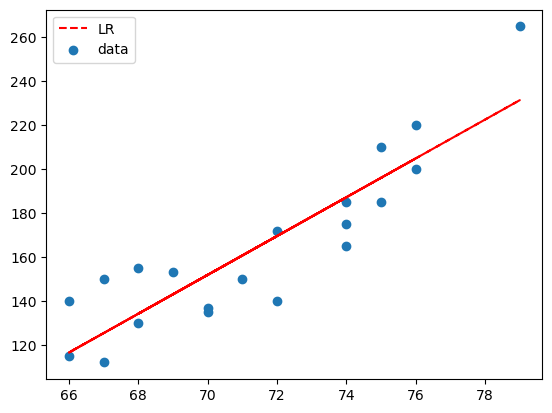

In [69]:
x, y = C[:,0].reshape(-1, 1), C[:,1].reshape(-1, 1)
model = linear_model.LinearRegression().fit(x,y)
r_sq = model.score(x, y)
print('Coef. of determination', r_sq)
print('Intercept\tSlope\n', np.round(model.intercept_[0],4),'\t', np.round(model.coef_[0][0],4))
y_vals = model.intercept_[0] + model.coef_[0][0] * x
plt.plot(x, y_vals, '--', c='r', label = 'LR')
plt.scatter(x, y, label='data')
plt.legend()

**Conclusion**

Coefficient of determination is close to zero so we can say that between height and weight in given dataset exist linear depence

### Task 2

**Table 3.4.** [Rencher p. 80](https://drive.google.com/file/d/163WNrEq6DMY7ryppXldQUmI9A7SEQFh0/view) Relative Weight, Blood Glucose, and Insulin Levels

In [70]:
_annot = '''Number y1 y2 x1 x2 x3'''
_data = '''1 .81 80 356 124 55
2 .95 97 289 117 76
3 .94 105 319 143 105
4 1.04 90 356 199 108
5 1.00 90 323 240 143
6 .76 86 381 157 165
7 .91 100 350 221 119
8 1.10 85 301 186 105
9 .99 97 379 142 98
10 .78 97 296 131 94
11 .90 91 353 221 53
12 .73 87 306 178 66
13 .96 78 290 136 142
14 .84 90 371 200 93
15 .74 86 312 208 68
16 .98 80 393 202 102
17 1.10 90 364 152 76
18 .85 99 359 185 37
19 .83 85 296 116 60
20 .93 90 345 123 50
21 .95 90 378 136 47
22 .74 88 304 134 50
23 .95 95 347 184 91
24 .97 90 327 192 124
25 .72 92 386 279 74
26 1.11 74 365 228 235
27 1.20 98 365 145 158
28 1.13 100 352 172 140
29 1.00 86 325 179 145
30 .78 98 321 222 99
31 1.00 70 360 134 90
32 1.00 99 336 143 105
33 .71 75 352 169 32
34 .76 90 353 263 165
35 .89 85 373 174 78
36 .88 99 376 134 80
37 1.17 100 367 182 54
38 .85 78 335 241 175
39 .97 106 396 128 80
40 1.00 98 277 222 186
41 1.00 102 378 165 117
42 .89 90 360 282 160
43 .98 94 291 94 71
44 .78 80 269 121 29
45 .74 93 318 73 42
46 .91 86 328 106 56'''

tmp = np.loadtxt(_data.splitlines())
A = tmp[:,1:]

Coef. of determination 0.25834168650748346
Intercept	Slope
 [0.6264] 	 [[ 0.0009 -0.001   0.0015]]


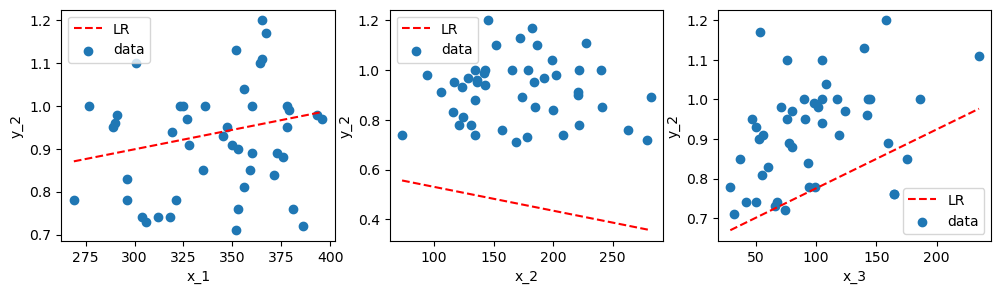

In [72]:
x, y = A[:,2:], A[:,0].reshape(-1, 1)
model1 = linear_model.LinearRegression().fit(x,y)
r_sq = model1.score(x, y)
print('Coef. of determination', r_sq)
print('Intercept\tSlope\n', np.round(model1.intercept_,4),'\t', np.round(model1.coef_,4))

fig, ax = plt.subplots(nrows=1, ncols=3, figsize = (12,3))
ax = ax.flatten()
for i in range(3):
    x_vals = np.linspace(x[:,i].min(), x[:,i].max(), 30 )
    y_vals = model1.intercept_[0] + model1.coef_[0][i] * x_vals
    ax[i].plot(x_vals, y_vals, '--', c='r', label = 'LR')
    ax[i].scatter(x[:,i], y, label='data')
    ax[i].legend()
    ax[i].set_xlabel(f'x_{i+1}')
    ax[i].set_ylabel(f'y_{2}')    

In [37]:
B =  np.linalg.inv(x.T @ x) @ (x.T @ y)
B #coef.

array([[ 0.00265972],
       [-0.00090103],
       [ 0.00163693]])

In [38]:
#check
_model = sm.OLS(y,x)
results = _model.fit() 
print(results.summary())
print(results.params) #coef
print(results.bse) #err

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.981
Method:                 Least Squares   F-statistic:                              790.1
Date:                Thu, 06 Apr 2023   Prob (F-statistic):                    1.31e-37
Time:                        09:43:31   Log-Likelihood:                          30.878
No. Observations:                  46   AIC:                                     -55.76
Df Residuals:                      43   BIC:                                     -50.27
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

**Conclusion**

$R^2$ is close to 1, so linear regression doesn't describes data well

### Task 3

multivariate LR for table 3.4

In [39]:
x, y = A[:,2:], A[:,:2]
model_ols =  linear_model.LinearRegression(normalize=False)
results2 = model_ols.fit(x,y)
print(model_ols.coef_)  
print(model_ols.intercept_)

[[ 0.00090822 -0.00095571  0.00148974]
 [ 0.02870058 -0.01272444 -0.00440592]]
[ 0.62639028 83.24254057]


D:\conda\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


In [73]:
df = pd.DataFrame(A, columns='y1 y2 x1 x2 x3'.split(' '))
# fit = MANOVA.from_formula('y ~ x', data= df, test =" Wilks ")
fit = MANOVA(df['y1 y2'.split(' ')], df['x1 x2 x3'.split(' ')])

print(fit.mv_test())

                  Multivariate linear model
                                                             
-------------------------------------------------------------
           x0           Value  Num DF  Den DF F Value  Pr > F
-------------------------------------------------------------
          Wilks' lambda 0.1549 2.0000 42.0000 114.6039 0.0000
         Pillai's trace 0.8451 2.0000 42.0000 114.6039 0.0000
 Hotelling-Lawley trace 5.4573 2.0000 42.0000 114.6039 0.0000
    Roy's greatest root 5.4573 2.0000 42.0000 114.6039 0.0000
-------------------------------------------------------------
                                                             
-------------------------------------------------------------
            x1           Value  Num DF  Den DF F Value Pr > F
-------------------------------------------------------------
           Wilks' lambda 0.9048 2.0000 42.0000  2.2085 0.1225
          Pillai's trace 0.0952 2.0000 42.0000  2.2085 0.1225
  Hotelling-Lawley trace 0